In [1]:
import pandas as pd
import csv
import re

In [2]:
def dropMissing(data):
    data = data.replace({"Unknown":None,"-":None})
    return data.dropna()

In [3]:
def cleanData(data):
    def titleise(text, exceptions1, ):
        return ' '.join([word if (word[:2] in exceptions[0] or (word[:2] in exceptions[1] and len(word) == 2)) else word.title()
                         for word in text.split()])

    exceptions = [{'d\'' , 'l\''}, {'la', 'de'}]

    return data.applymap(lambda s:titleise(s, exceptions) if type(s) == str else s)

Q1

In [29]:
data = pd.read_csv('accidents_2017.csv', float_precision='high')
data = cleanData(data)
print(data.head(10).to_csv(sep=' ',index=False))

Id "District Name" "Neighborhood Name" Street Weekday Month Day Hour "Part of the day" "Mild injuries" "Serious injuries" Victims "Vehicles involved" Longitude Latitude
2017S008429 Unknown Unknown "Número 27" Friday October 13 8 Morning 2 0 2 2 2.12562442 41.34004482
2017S007316 Unknown Unknown "Número 3 Zona Franca / Número 50 Zona Franca" Friday September 1 13 Morning 2 0 2 2 2.12045245 41.33942606
2017S010210 Unknown Unknown "Litoral (Besòs)" Friday December 8 21 Afternoon 5 0 5 2 2.1673561 41.3608855
2017S006364 Unknown Unknown "Número 3 Zona Franca" Friday July 21 2 Night 1 0 1 2 2.12452894 41.33766786
2017S004615 "Sant Martí" "El Camp de l'Arpa Del Clot" "Las Navas de Tolosa" Thursday May 25 14 Afternoon 1 0 1 3 2.185272 41.416365
2017S007775 "Sant Martí" "El Camp de l'Arpa Del Clot" "Indústria / Trinxant" Wednesday September 20 12 Morning 1 0 1 2 2.183245 41.416336
2017S004484 "Sant Martí" "El Camp de l'Arpa Del Clot" "Trinxant / Indústria" Saturday May 20 21 Afternoon 1 0 1 2 2

Q2

In [17]:
data = pd.read_csv('accidents_2017.csv', float_precision='high')
data = dropMissing(data)
data = cleanData(data)
data.to_csv("result_q2.csv",quoting=csv.QUOTE_NONNUMERIC,index=False)

Q3

In [31]:
data = pd.read_csv('accidents_2017.csv',index_col='Id', float_precision='high')
data = dropMissing(data)
data = cleanData(data)

data2 = data.groupby(['District Name']).size().sort_values(ascending=False).to_frame().reset_index()
data2.columns = ['District Name', 'Total numbers of accidents']
print(data2.to_csv(sep=' ',index=False))

"District Name" "Total numbers of accidents"
Eixample 3029
"Sant Martí" 1336
"Sarrià-Sant Gervasi" 1104
Sants-Montjuïc 1104
Horta-Guinardó 743
"Les Corts" 726
"Ciutat Vella" 600
"Sant Andreu" 597
"Nou Barris" 542
Gràcia 531



Q4

In [38]:
airStations = pd.read_csv('air_stations_Nov2017.csv')
airStations = cleanData(airStations)
print(airStations[['Station','District Name']].to_json(orient='records'))
print()

[{"Station":"Barcelona - Ciutadella","District Name":"Ciutat Vella"},{"Station":"Barcelona - Eixample","District Name":"Eixample"},{"Station":"Barcelona - Gr\u00e0cia","District Name":"Gracia"},{"Station":"Barcelona - Palau Reial","District Name":"Les Corts"},{"Station":"Barcelona - Poblenou","District Name":"Sant Marti"},{"Station":"Barcelona - Sants","District Name":"Sants-Montjuic"},{"Station":"Barcelona - Vall Hebron","District Name":"Horta-Guinardo"},{"Station":"Barcelona - Vallvidrera, El Tibidabo I Les Planes","District Name":"Sarri\u00e0-Sant Gervasi"}]



In [33]:
airQuality = pd.read_csv('air_quality_Nov2017.csv')
airQuality = dropMissing(airQuality)
print(airQuality.loc[airQuality['Air Quality'] != 'Good'].head(10).to_csv(sep=' ',index=False))

Station "Air Quality" Longitude Latitude "O3 Hour" "O3 Quality" "O3 Value" "NO2 Hour" "NO2 Quality" "NO2 Value" "PM10 Hour" "PM10 Quality" "PM10 Value" Generated "Date Time"
"Barcelona - Eixample" Moderate 2.1538 41.3853 0h Good 1.0 0h Moderate 113.0 0h Good 36.0 "01/11/2018 0:00" 1541027104
"Barcelona - Eixample" Moderate 2.1538 41.3853 20h Good 1.0 20h Moderate 92.0 21h Good 17.0 "02/11/2018 21:00" 1541189103
"Barcelona - Eixample" Moderate 2.1538 41.3853 20h Good 10.0 20h Moderate 99.0 21h Good 16.0 "04/11/2018 21:00" 1541361903
"Barcelona - Eixample" Moderate 2.1538 41.3853 10h Good 3.0 10h Moderate 105.0 11h Good 32.0 "05/11/2018 11:00" 1541412303
"Barcelona - Eixample" Moderate 2.1538 41.3853 8h Good 2.0 8h Moderate 103.0 8h Good 13.0 "07/11/2018 9:00" 1541577903
"Barcelona - Eixample" Moderate 2.1538 41.3853 9h Good 2.0 9h Moderate 112.0 9h Good 14.0 "07/11/2018 10:00" 1541581503
"Barcelona - Eixample" Moderate 2.1538 41.3853 10h Good 4.0 10h Moderate 93.0 10h Good 15.0 "07/11/2

In [34]:
airQuality['Hour'] = airQuality.apply(lambda row: pd.to_datetime(row['Generated'], dayfirst=True).hour, axis=1)
airQuality['Day'] = airQuality.apply(lambda row: pd.to_datetime(row['Generated'], dayfirst=True).day, axis=1)
airQuality['Month'] = airQuality.apply(lambda row: pd.to_datetime(row['Generated'], dayfirst=True).month, axis=1)

airQuality = airQuality.merge(airStations[['Station','District Name']])
#airQuality.set_index(['Day', 'Month', 'Hour','District Name'], inplace=True)

In [36]:
accidents = pd.read_csv('accidents_2017.csv', float_precision='high')
accidents = dropMissing(accidents)
accidents = cleanData(accidents)

monthsDict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,
              'August':8,'September':9,'October':10,'November':11,'December':12}

#accidents = accidents.rename(columns={'Month': 'MonthString'})

accidents['MonthNumber'] = accidents.apply(lambda row: monthsDict[row['Month']], axis=1)
#accidents.set_index(['Day', 'Month', 'Hour','District Name'], inplace=True)

accidents_airQuality = accidents.merge(airQuality[['Day', 'Month', 'Hour','District Name','Air Quality']],
                                       left_on=['Day', 'MonthNumber', 'Hour','District Name'],
                                       right_on=['Day', 'Month', 'Hour','District Name'])

accidents_airQuality = accidents_airQuality.rename(columns={'Month_x': 'Month'})

accidents_badAirQuality = accidents_airQuality.loc[accidents_airQuality['Air Quality'] != 'Good']

accidents_badAirQuality.drop(['Air Quality','Month_y','MonthNumber'], axis=1).to_csv("result_q4.csv",quoting=csv.QUOTE_NONNUMERIC,index=False)


Q5

In [68]:
%matplotlib notebook
import matplotlib.pyplot as plt
geoData = pd.read_csv('accidents_2017.csv', float_precision='high')
geoData = dropMissing(geoData)

import matplotlib.image as mpimg
mapImg=mpimg.imread('Map.png')


In [69]:
geoDataAgg = geoData.groupby(["Latitude","Longitude"]).agg('sum').reset_index().sort_values(by='Victims',ascending=False)
# geoData.groupby(["Latitude","Longitude"]).agg(lambda x: x)

In [77]:
geoDataAgg["Vehicles involved"].value_counts().sort_values(ascending=False)

2     2506
1     1120
3      558
4      497
5      194
6      178
7       92
8       89
9       74
10      53
12      42
11      40
13      31
14      27
16      19
15      15
18      15
17      14
22      14
19      12
21       9
25       8
20       7
24       6
26       6
23       5
31       5
36       3
38       2
32       2
0        2
41       2
30       2
34       2
27       2
63       1
47       1
46       1
28       1
55       1
97       1
49       1
33       1
29       1
71       1
Name: Vehicles involved, dtype: int64

<IPython.core.display.Javascript object>


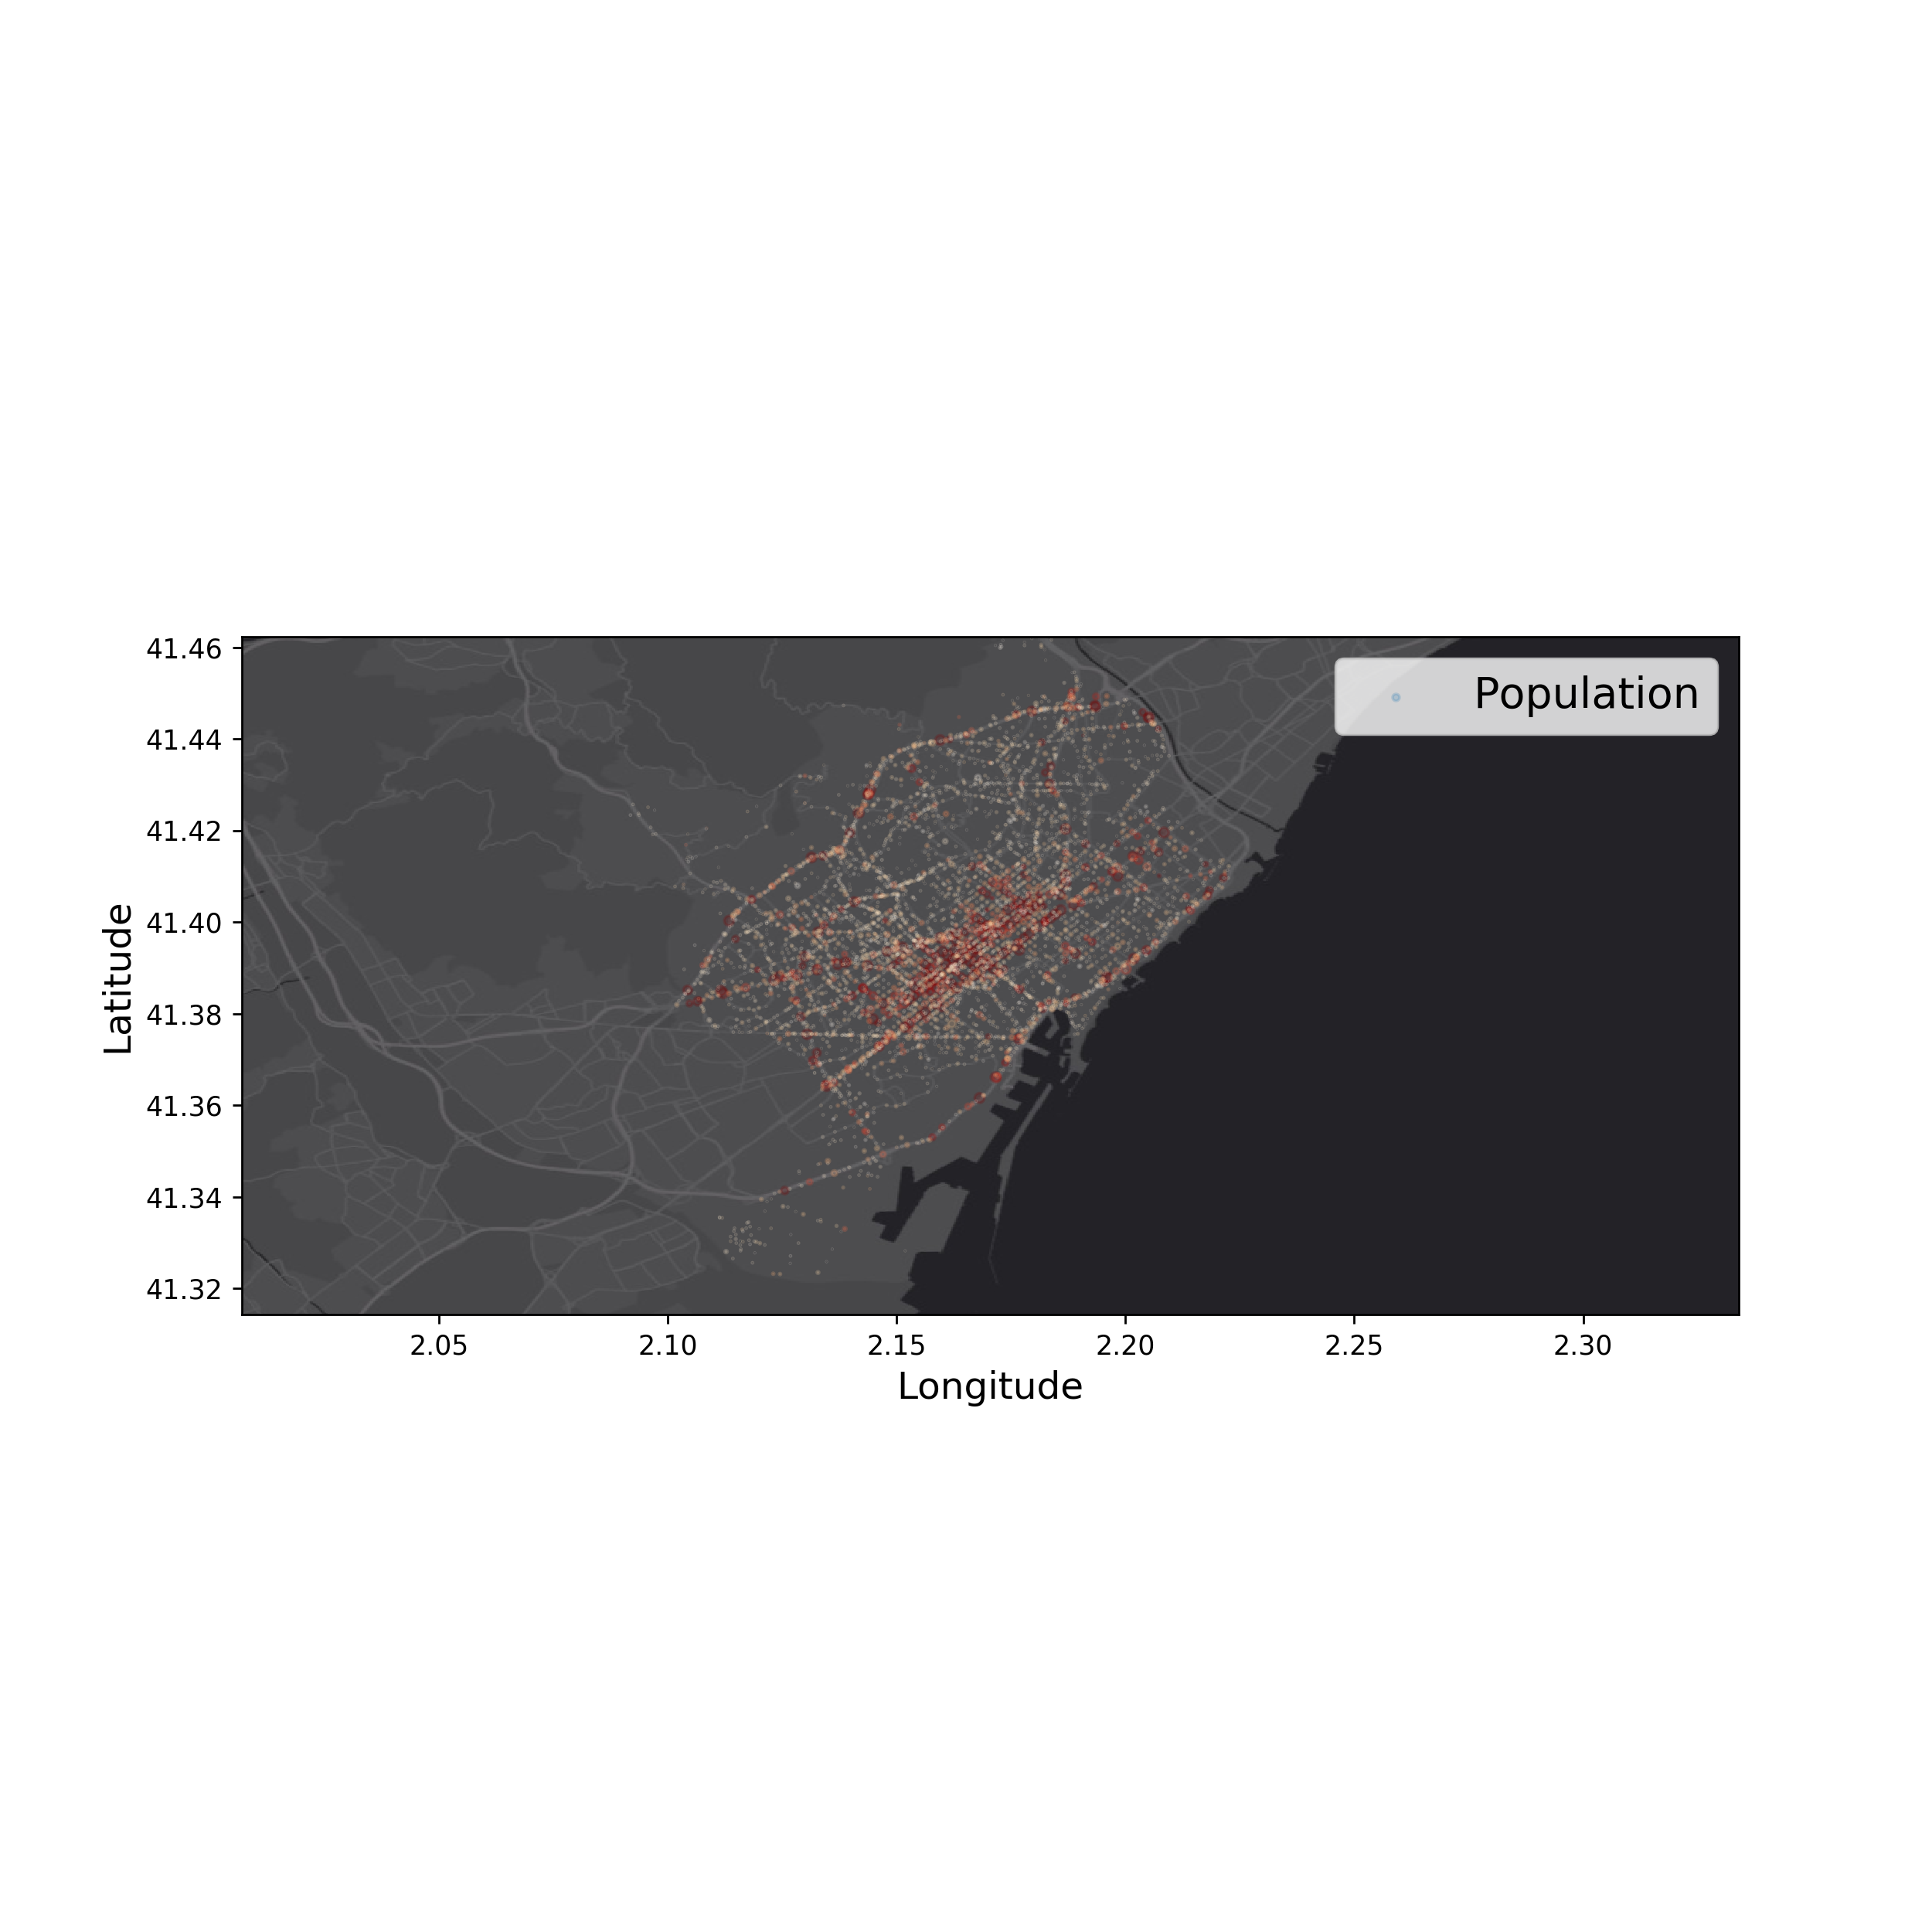

In [83]:
# Change outliers to top value to make colour bar and dot size more descriptive
geoDataAgg.loc[geoDataAgg['Victims'] > 10, 'Victims'] = 10
geoDataAgg.loc[geoDataAgg['Vehicles involved'] > 20, 'Vehicles involved'] = 20

geoDataAgg.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,10),
                       s=(geoDataAgg['Vehicles involved']**2)/30, label="Population",
                       c=geoDataAgg["Victims"], cmap=plt.get_cmap("OrRd"),
                       colorbar=False, alpha=0.2
                      )

# plt.imshow(mapImg, extent=[1.916805, 2.42321, 41.282911,41.493609], alpha=1)
plt.imshow(mapImg, extent=[2.006874, 2.334000, 41.314292,41.462289], alpha=1)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()